# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
import numpy as np
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
mouse_count =  len(mouse_study_merged["Mouse ID"].unique())
mouse_count

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = mouse_study_merged[mouse_study_merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = mouse_study_merged[mouse_study_merged.duplicated()]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_merged = mouse_study_merged[mouse_study_merged['Mouse ID'] != 'g989']
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count =  len(mouse_study_merged["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regiment_group = mouse_study_merged.groupby("Drug Regimen")
regiment_group.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = regiment_group['Tumor Volume (mm3)'].mean()
median_tumor_vol = regiment_group['Tumor Volume (mm3)'].median()
variance_tumor = regiment_group['Tumor Volume (mm3)'].var()
std_dev_tumor = regiment_group['Tumor Volume (mm3)'].std()
sem_tumor = regiment_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regiment_summary = pd.DataFrame(({'Mean Tumor Volume (mm3)': mean_tumor_vol,
                                  'Median Tumor Volume (mm3)': median_tumor_vol,
                                  'Tumor Volume Variance': variance_tumor,
                                  'Tumor Volume Std Dev': std_dev_tumor,
                                  'Tumor Volume SEM': sem_tumor}))
regiment_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regiment_group['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

,std,mean,var,median,sem
Drug Regimen,,,,,
Capomulin,4.994774,40.675741,24.947764,41.557809,0.329346
Ceftamin,6.268188,52.591172,39.290177,51.776157,0.469821
Infubinol,6.567243,52.884795,43.128684,51.820584,0.492236
Ketapril,8.279709,55.235638,68.553577,53.698743,0.603860
Naftisol,8.134708,54.331565,66.173479,52.509285,0.596466
Placebo,7.821003,54.033581,61.168083,52.288934,0.581331
Propriva,6.622085,52.320930,43.852013,50.446266,0.544332
Ramicane,4.846308,40.216745,23.486704,40.673236,0.320955
Stelasyn,7.710419,54.233149,59.450562,52.431737,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Drug')

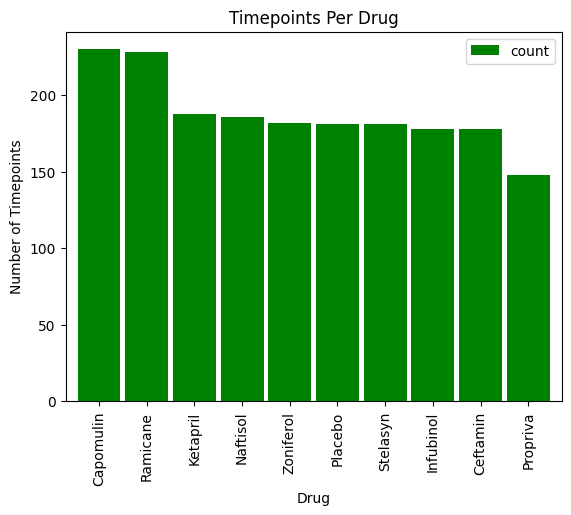

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_barChart = mouse_study_merged['Drug Regimen'].value_counts().plot.bar(color='green', width=0.9, zorder=3)
pandas_barChart.legend(loc=1)
pandas_barChart.set_xlabel("Drug")
pandas_barChart.set_ylabel("Number of Timepoints")
pandas_barChart.set_title("Timepoints Per Drug")

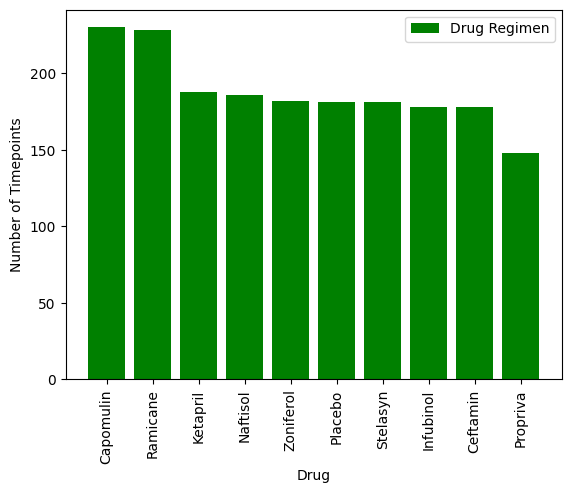

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = mouse_study_merged["Drug Regimen"].value_counts()
x_axis = list(range(len(y_axis)))
plt.bar(x_axis, y_axis, color='green', alpha=1, label='Drug Regimen')
plt.legend(loc="upper right")
plt.xlabel("Drug")
plt.ylabel("Number of Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.show()

<Axes: ylabel='Count'>

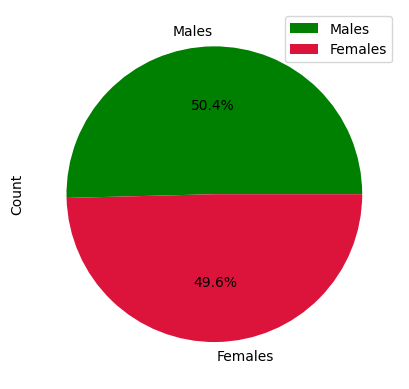

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_data = mouse_study_merged.loc[mouse_study_merged["Sex"] == "Female"]
female_count = len(female_data["Mouse ID"].unique())
male_data = mouse_study_merged.loc[mouse_study_merged["Sex"] == 'Male']
male_count = len(male_data['Mouse ID'].unique())
sex_data = [['Males', male_count], ["Females", female_count]]
sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])
sex_df = sex_df.set_index('Sex')
pie_labels = ['Males', 'Females']
pie_colors = ['green', 'crimson']
sex_df.plot(kind='pie', y='Count', autopct='%1.1f%%', colors=pie_colors, labels=pie_labels)


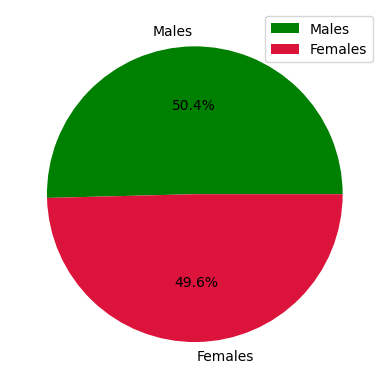

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mvf_list = [male_count, female_count]
plt.pie(mvf_list, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%')
plt.legend(loc="upper right")


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

lastGreat_timepoint = mouse_study_merged.groupby(['Mouse ID']).agg(
    Timepoint=('Timepoint', 'max')).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_data = lastGreat_timepoint.merge(mouse_study_merged, how='inner', on=['Mouse ID', 'Timepoint'])
last_timepoint_data.tail(50)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
198,v409,10,Placebo,Female,16,25,50.649038,1
199,v603,35,Ketapril,Female,22,30,63.189432,1
200,v719,20,Infubinol,Female,17,30,54.048608,1
201,v764,15,Stelasyn,Female,5,30,49.412624,2
202,v766,15,Infubinol,Male,16,27,51.542431,1
203,v835,20,Naftisol,Male,7,29,51.296543,2
204,v923,45,Capomulin,Female,19,21,40.658124,2
205,v989,10,Placebo,Male,4,25,52.614689,1
206,v991,45,Propriva,Female,10,30,70.167749,4
207,w140,5,Zoniferol,Female,19,30,47.717952,0


In [61]:
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_data.loc[last_timepoint_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    tumor_vol_list.append(tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) 
                  | (tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug} Treatment")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers." )
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers." )
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}" )
    print(f"Number of outliers for {drug} is: {outliers.count()}\n ----------------------------------------------------------\n" )
   
 


Capomulin Treatment
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
 ----------------------------------------------------------

Ramicane Treatment
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
 ----------------------------------------------------------

Infubinol Treatment
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
 ----------------------------------------------------------

Ceftamin Treatment
Final tumor volume(mm3) for Ceftamin below 25.36 could be outli

<function matplotlib.pyplot.show(close=None, block=None)>

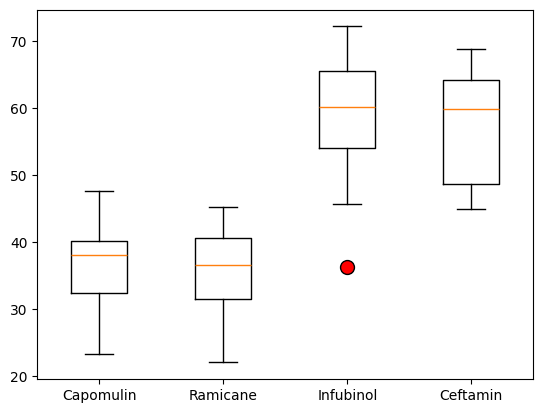

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

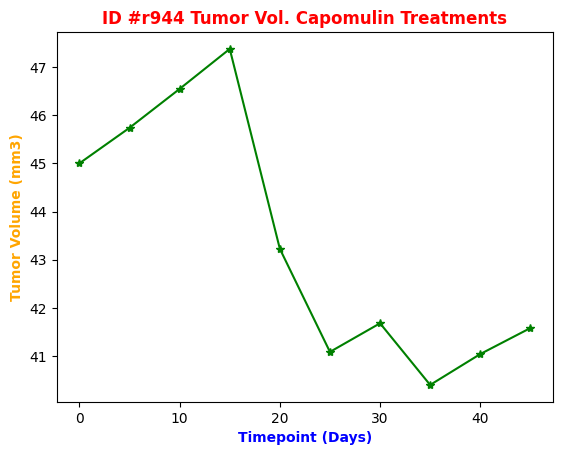

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = mouse_study_merged.loc[mouse_study_merged['Drug Regimen'] == 'Capomulin']

#Choosing mouse id and df of mouse id
mouse_id = 'r944'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='green')

plt.title(f"ID #{mouse_id} Tumor Vol. Capomulin Treatments", fontweight='bold', color="Red")
plt.xlabel('Timepoint (Days)', fontweight='bold', color="Blue")
plt.ylabel('Tumor Volume (mm3)', fontweight='bold', color="Orange")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

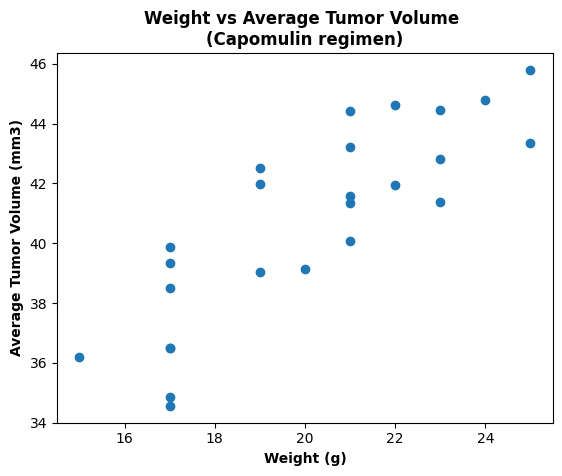

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_gp = Capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

#Create Scatter Plot
plt.scatter(Capomulin_gp["Weight (g)"], Capomulin_gp["Tumor Volume (mm3)"])

#label scatter plot

plt.title('Weight vs Average Observed Tumor Volume \n(Capomulin Treament)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')




## Correlation and Regression

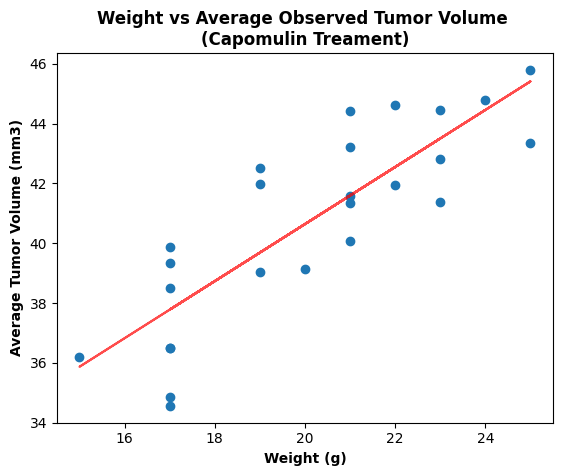

In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_gp = Capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

#Create Scatter Plot
plt.scatter(Capomulin_gp["Weight (g)"], Capomulin_gp["Tumor Volume (mm3)"])

#label scatter plot

plt.title('Weight vs Average Observed Tumor Volume \n(Capomulin Treament)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Calculate the correlation
correlation, _ = st.pearsonr(Capomulin_gp["Weight (g)"], Capomulin_gp["Tumor Volume (mm3)"])
correlation = round(correlation, 2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_gp["Weight (g)"], Capomulin_gp["Tumor Volume (mm3)"])
r_squared = round(rvalue**2,2)

#Regression Vale
regression_values = Capomulin_gp["Weight (g)"] * slope + intercept
line_ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#generate Line 
plt.plot(Capomulin_gp["Weight (g)"],regression_values, color='r', alpha=0.7)